In [ ]:
print("EHorizon")

EHorizon


In [ ]:
train_data_path = "/content/drive/MyDrive/AI and ML/movie_review_dataset/train_movie_review.csv"
test_data_path = "/content/drive/MyDrive/AI and ML/movie_review_dataset/test_movie_review.csv"
val_data_path = "/content/drive/MyDrive/AI and ML/movie_review_dataset/val_movie_review.csv"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Text Preprocessing

###Data Load

In [ ]:
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
val_df = pd.read_csv(val_data_path)

In [ ]:
#viewing shapes
print("Train data shape: ", train_df.shape)
print("Test data shape: ", test_df.shape)
print("Validation data shape: ", val_df.shape)

Train data shape:  (35000, 3)
Test data shape:  (10000, 3)
Validation data shape:  (5000, 3)


In [ ]:
#viewing dataset
train_df.head()

,Unnamed: 0,review,sentiment
0,3774,"Having avoided seeing the movie in the cinema,...",0
1,48396,With this movie I was really hoping that the i...,0
2,1980,Raymond Burr stars as an attorney caught up in...,0
3,6703,A lot people get hung up on this films tag as ...,1
4,28168,I was a fan of Buffy and hoped it would come t...,0


In [ ]:
#checking null values
print("-"*30)
print("Train df null values: ", train_df.isnull().sum())
print("-"*30)
print("Test df null values: ", test_df.isnull().sum())
print("-"*30)
print("Validation df null values: ", val_df.isnull().sum())
print("-"*30)


------------------------------
Train df null values:  Unnamed: 0    0
review        0
sentiment     0
dtype: int64
------------------------------
Test df null values:  Unnamed: 0    0
review        0
sentiment     0
dtype: int64
------------------------------
Validation df null values:  Unnamed: 0    0
review        0
sentiment     0
dtype: int64
------------------------------


In [ ]:
#checking duplicated value
print("Train df duplicated values: ", train_df.duplicated().sum())
print("Test df duplicated values: ", test_df.duplicated().sum())
print("Validation df duplicated values: ", val_df.duplicated().sum())

Train df duplicated values:  0
Test df duplicated values:  0
Validation df duplicated values:  0


In [ ]:
#checking types of columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35000 non-null  int64 
 1   review      35000 non-null  object
 2   sentiment   35000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 820.4+ KB


In [ ]:
train_df.dtypes

,0
Unnamed: 0,int64
review,object
sentiment,int64


In [ ]:
#unique sentiment classes
train_df['sentiment'].unique()

array([0, 1])

In [ ]:
train_df['review'][0][:50]

'Having avoided seeing the movie in the cinema, but'

###Data Cleaning

In [ ]:
#texty to lowercase
def lower_case(text):
  return text.lower()

lower_case("Having avoided seeing the movie in the cinema, but")

'having avoided seeing the movie in the cinema, but'

In [ ]:
#applying to train,text and val
train_df['review'] = train_df['review'].apply(lower_case)
test_df['review'] = test_df['review'].apply(lower_case)
val_df['review'] = val_df['review'].apply(lower_case)

In [ ]:
#remove punctuation
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

remove_punctuation("Hello! How are you?")

'Hello How are you'

In [ ]:
#apply to all
train_df['review'] = train_df['review'].apply(remove_punctuation)
test_df['review'] = test_df['review'].apply(remove_punctuation)
val_df['review'] = val_df['review'].apply(remove_punctuation)

In [ ]:
#removing special character
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)        # Remove URLs
    text = re.sub(r"@\w+", '', text)                           # Remove mentions
    text = re.sub(r"#\w+", '', text)                           # Remove hashtags
    text = re.sub(r"\d+", '', text)                            # Remove numbers
    text = re.sub(r"[^\w\s]", '', text)                        # Remove special characters
    return text

text_example = "hello @saurav, today is #funny day to visit 12 http://email.com"
clean_text(text_example)

'hello  today is  day to visit  '

In [ ]:
#applying to train, text and val
train_df['review'] = train_df['review'].apply(clean_text)
test_df['review'] = test_df['review'].apply(clean_text)
val_df['review'] = val_df['review'].apply(clean_text)


In [ ]:
# remove html tags if have any
def remove_html_tag(text):
    text = re.sub(r'<br\s*/?>', ' ', text)  # replaces <br>, <br/>, <br /> with space
    text = re.sub(r'<.*?>', '', text)       # removes any other HTML tags
    text = re.sub(r'\bbr\b', ' ', text) #removing br
    return text

remove_html_tag("<div>hello</div> <br> br this</br> is <p>AI Bot </p>")

'hello     this is AI Bot '

In [ ]:
#applying to all
train_df['review'] = train_df['review'].apply(remove_html_tag)
test_df['review'] = test_df['review'].apply(remove_html_tag)
val_df['review'] = val_df['review'].apply(remove_html_tag)

In [ ]:
#removing empty spaces betwen text
def remove_extra_spaces(text):
    return ' '.join(text.split())

remove_extra_spaces("This code   is on   python")

'This code is on python'

In [ ]:
#apply to all
train_df['review'] = train_df['review'].apply(remove_extra_spaces)
test_df['review'] = test_df['review'].apply(remove_extra_spaces)
val_df['review'] = val_df['review'].apply(remove_extra_spaces)

In [ ]:
#stop word removel
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords


# Load stopwords once
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    return " ".join([w for w in text.split() if w not in stop_words])


remove_stopword("I am a good boy")

'I good boy'

In [ ]:
#apply to all
train_df['review'] = train_df['review'].apply(remove_stopword)
test_df['review'] = test_df['review'].apply(remove_stopword)
val_df['review'] = val_df['review'].apply(remove_stopword)

In [ ]:
#dropping the first column "Unnamed"
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)
val_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#review after clean
train_df.sample(5)

,review,sentiment
2585,lion king serious story young lion growing ave...,1
11124,vast minority also didnt much care original ca...,1
15076,saw film first time older brother one great de...,1
20642,romanticised thoroughly false vision unemploym...,0
14244,one greatest childpet movies ever created cry ...,1


###Saving Cleaned Dataset

In [ ]:
#saving cleaned dataset
train_df.to_csv('cleaned_train_movie_review.csv', index=False)
test_df.to_csv('cleaned_test_movie_review.csv', index=False)
val_df.to_csv('cleaned_val_movie_review.csv', index=False)

In [ ]:
#for test (using clean dataset ) direct continue from here - uncomment code below
# train_df = pd.read_csv('/content/drive/MyDrive/AI and ML/movie_review_dataset/cleaned_train_movie_review.csv')
# test_df = pd.read_csv('/content/drive/MyDrive/AI and ML/movie_review_dataset/cleaned_test_movie_review.csv')
# val_df = pd.read_csv('/content/drive/MyDrive/AI and ML/movie_review_dataset/cleaned_val_movie_review.csv')

### Visulizing the cleaned data

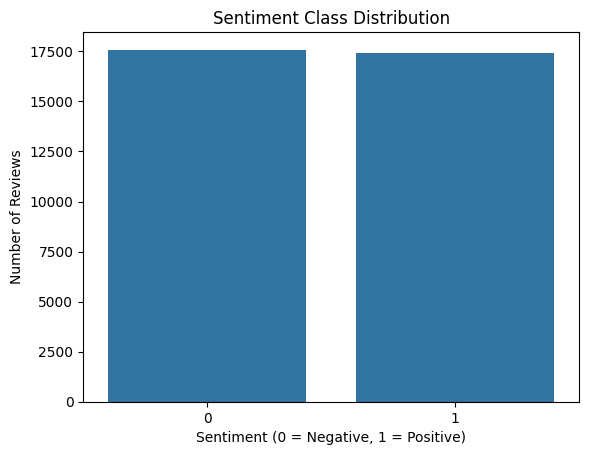

In [ ]:
#class distribution
sns.countplot(data=train_df, x='sentiment')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Number of Reviews')
plt.show()

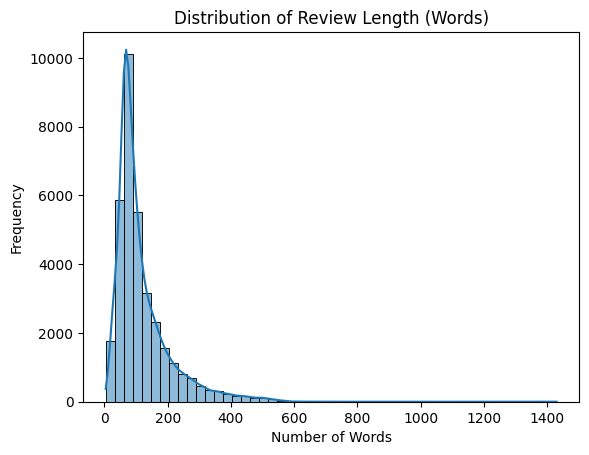

In [ ]:
#review length distribution
train_df['review_length'] = train_df['review'].apply(lambda x: len(x.split()))

sns.histplot(train_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


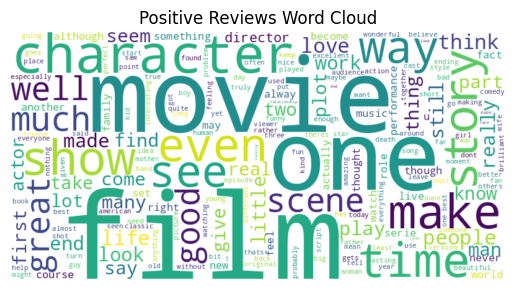

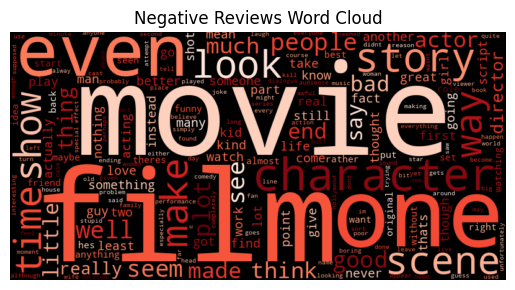

In [ ]:
#word cloud for each sentiment - most frequent words in positive and negitive sentiment
from wordcloud import WordCloud

positive_text = " ".join(train_df[train_df['sentiment'] == 1]['review'])
negative_text = " ".join(train_df[train_df['sentiment'] == 0]['review'])

# Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


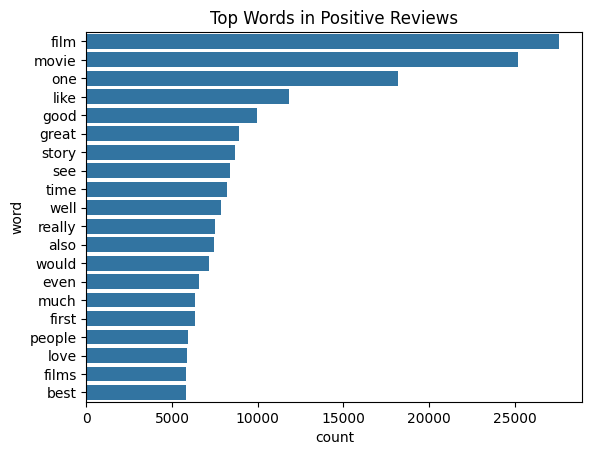

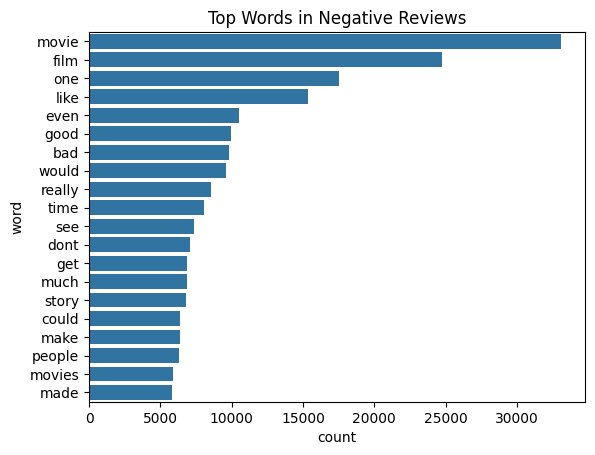

In [ ]:
#most common word per class
from collections import Counter
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=20):
    words = " ".join(texts).lower().split()
    words = [w for w in words if w not in stop_words]
    return Counter(words).most_common(n)

# Example: Top words in positive reviews
top_pos = get_top_words(train_df[train_df['sentiment'] == 1]['review'])
top_neg = get_top_words(train_df[train_df['sentiment'] == 0]['review'])

# Convert to DataFrame for plotting
import pandas as pd

pos_df = pd.DataFrame(top_pos, columns=['word', 'count'])
sns.barplot(data=pos_df, x='count', y='word')
plt.title('Top Words in Positive Reviews')
plt.show()

neg_df = pd.DataFrame(top_neg, columns=['word', 'count'])
sns.barplot(data=neg_df, x='count', y='word')
plt.title('Top Words in Negative Reviews')
plt.show()


In [ ]:
train_df.head()

,review,sentiment,review_length
0,avoided seeing movie cinema buying dvd wife xm...,0,144
1,movie really hoping idea make hashed together ...,0,489
2,raymond burr stars attorney caught murder best...,0,118
3,lot people get hung films tag childrens film c...,1,500
4,fan buffy hoped would come proper end angel go...,0,81


##Tokenization And Padding

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 105.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [ ]:
!pip uninstall numpy jax

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-2.0.2
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/jax-0.5.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/jax/*
Proceed (Y/n)? y
  Successfully uninstalled jax-0.5.2


In [ ]:
!pip install jax==0.4.13 "numpy>=1.21"

  Using cached jax-0.4.13.tar.gz (1.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 82.2 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518817 sha256=f017cec2b4cbe599d53261c577a8b831f10c20e730c2cfbff052e17c09af58f2
  Stored in directory: /root/.cache/pip/wheels/27/92/71/d84a9839f7b65be96d83697684a7e6d5d2db73cd9e4ce4e9a1
Successfully built jax
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.13 which is incompatible.
optax 0.2.4 requires jax>=0.4

In [ ]:
#imports
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:


# Sample text data
texts = [
    "i love this movie i is best",
    "this is worse movie",
    "i can watch this movie thousand time in my entire life"
]

# Step 1: Initialize the tokenizer
tokenizer = Tokenizer()

# Step 2: Fit the tokenizer on your text data
tokenizer.fit_on_texts(texts)

# Step 3: Convert the text to integer sequences
sequences = tokenizer.texts_to_sequences(texts)

# Print the integer sequences
print("Integer Sequences:")
for seq in sequences:
    print(seq)

# If you want to see the mapping of words to integers:
print("\nWord Index Mapping:")
print(tokenizer.word_index)


# Padding Part

# Step 4: Padding the sequences to ensure they all have the same length
# You can set maxlen to control the sequence length after padding.
padded_sequences = pad_sequences(sequences, padding='post')  # 'post' adds padding at the end of the sequence

# Print the padded sequences
print("\nPadded Sequences:")
for seq in padded_sequences:
    print(seq)

# If you want to see the mapping of words to integers:
print("\nWord Index Mapping:")
print(tokenizer.word_index)


Integer Sequences:
[1, 5, 2, 3, 1, 4, 6]
[2, 4, 7, 3]
[1, 8, 9, 2, 3, 10, 11, 12, 13, 14, 15]

Word Index Mapping:
{'i': 1, 'this': 2, 'movie': 3, 'is': 4, 'love': 5, 'best': 6, 'worse': 7, 'can': 8, 'watch': 9, 'thousand': 10, 'time': 11, 'in': 12, 'my': 13, 'entire': 14, 'life': 15}

Padded Sequences:
[1 5 2 3 1 4 6 0 0 0 0]
[2 4 7 3 0 0 0 0 0 0 0]
[ 1  8  9  2  3 10 11 12 13 14 15]

Word Index Mapping:
{'i': 1, 'this': 2, 'movie': 3, 'is': 4, 'love': 5, 'best': 6, 'worse': 7, 'can': 8, 'watch': 9, 'thousand': 10, 'time': 11, 'in': 12, 'my': 13, 'entire': 14, 'life': 15}


In [ ]:
#applying on dataset
# Step 1: Initialize the tokenizer (limit to 10000 vocab)
tokenizer = Tokenizer(num_words=10000)

# Step 2: Fit the tokenizer on your 'review' column (the text data)
tokenizer.fit_on_texts(train_df['review'])

# Step 3: Convert the 'review' column text into integer sequences
train_sequences = tokenizer.texts_to_sequences(train_df['review'])
test_sequences = tokenizer.texts_to_sequences(test_df['review'])
val_sequences = tokenizer.texts_to_sequences(val_df['review'])


In [ ]:
# Get lengths of all training sequences
seq_lengths = [len(seq) for seq in train_sequences]
# Compute the 95th percentile length
maxLength = max(seq_lengths)
print(f"Padding all sequences to maxlen 100% = {maxLength}")
maxlent = int(np.percentile(seq_lengths, 95))
print(f"Padding all sequences to maxlen of 95% = {maxlent}")
maxlen = int(np.percentile(seq_lengths, 90))
print(f"Padding all sequences to maxlen of 90% = {maxlen}")

Padding all sequences to maxlen 100% = 1082
Padding all sequences to maxlen of 95% = 261
Padding all sequences to maxlen of 90% = 202


In [ ]:
# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=maxlen, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')


In [ ]:
#target data
train_labels = train_df['sentiment'].values
test_labels = test_df['sentiment'].values
val_labels = val_df['sentiment'].values

In [ ]:
#printing shapes
print("Feature Shape : ")
print("Train data shape: ", train_padded.shape)
print("Test data shape: ", test_padded.shape)
print("Validation data shape: ", val_padded.shape)
print("-"*30)
print("Target Shape : ")
print("Train data shape: ", train_labels.shape)
print("Test data shape: ", test_labels.shape)
print("Validation data shape: ", val_labels.shape)

Feature Shape : 
Train data shape:  (35000, 202)
Test data shape:  (10000, 202)
Validation data shape:  (5000, 202)
------------------------------
Target Shape : 
Train data shape:  (35000,)
Test data shape:  (10000,)
Validation data shape:  (5000,)


In [ ]:
#example
train_padded[0]

array([4304,  199,    1,  345, 2545,  165,  224,   29,  382,   12,  478,
        653,   14, 1806, 1806,    4,    4,  582,   75,    2,  265,  822,
         41,  173,    4,  126,  573, 5187,  220,  582,  797,    3,   63,
       7946,  752, 1495, 2350, 5608, 1650, 2050,  165, 1111,  140,  236,
       2059,   42,  181,  752, 5158, 2051, 8613,  825,  289, 2783,  826,
        177,  177, 1495,    7, 4118, 4975, 2921,   10,   53,   78,    6,
         23,  541, 1025, 2226,  573, 1590,  305, 2380,  190, 4865, 1620,
        766,   79,  206,  272, 3376,  615, 3377, 1720, 4200, 5301, 1004,
        274, 2253,  205,  272,  431,  475,  603,    4,   17, 4446,    3,
         33, 4569,  242,  113, 4510,   27,    6,  328, 8238,  305,  310,
       3699,    2, 2141,   38, 3304,  165, 3666, 2809, 3579,   74,    9,
       3985, 2141, 1115, 2500,  146,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
#vocab size
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size: ", vocab_size)

Vocab size:  143571


##Model Training

In [ ]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM,Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#constants | hyperparameters
# Hyperparameters
vocab_size = 10000     #vocab size given on tokenization part
embedding_dim = 100    # word embedding dimensions
maxlen = 202           # maxlen from above

####Simple RNN

In [ ]:

simple_rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

# simple_rnn_model.summary()

####LSTM

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

####LSTM with Word2Vec Embedding

In [ ]:
!pip install numpy==1.23.5
!pip install gensim
!pip install jax==0.4.13

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.13 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
optax 0.2.4 requires j

In [ ]:
import gensim.downloader as api
# Load Pre-trained GloVe Embeddings
embedding_model = api.load("glove-wiki-gigaword-100") # 100-dimensional word2vec

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Create an embedding matrix
embedding_dim = 100  # GloVe 100d
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in embedding_model:
        embedding_vector = embedding_model[word]
        # Subtract 1 from the index 'i' to align with the embedding_matrix indices
        if i < vocab_size:  # Check if index is within bounds
            embedding_matrix[i - 1] = embedding_vector
    else:
        # Words not found in embedding index will be all-zeros
        pass

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Embedding matrix shape: (10000, 100)


In [ ]:
lstm_w2v_model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              trainable=True),  # Freeze embeddings
    LSTM(64),
    Dense(1, activation='sigmoid')
])




##Model Evaluation

###Compile

In [ ]:
# simple rnn
simple_rnn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


#callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# lstm
lstm_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

#callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# lstm-w2v
lstm_w2v_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)



#callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

###Train

In [ ]:
history1 = simple_rnn_model.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=10,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4992 - loss: 0.6959 - val_accuracy: 0.5090 - val_loss: 0.6939
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5155 - loss: 0.6922 - val_accuracy: 0.4934 - val_loss: 0.6946
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.5501 - loss: 0.6672 - val_accuracy: 0.4940 - val_loss: 0.7055
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5607 - loss: 0.6233 - val_accuracy: 0.4930 - val_loss: 0.7301


In [ ]:
simple_rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 202, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,031,877 (11.57 MB)

 Trainable params: 1,010,625 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,021,252 (7.71 MB)

In [ ]:
history2 = lstm_model.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=10,
    batch_size=128,
    callbacks=[early_stop]
)


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5047 - loss: 0.6933 - val_accuracy: 0.5102 - val_loss: 0.6922
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5310 - loss: 0.6869 - val_accuracy: 0.5402 - val_loss: 0.6724
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5418 - loss: 0.6818 - val_accuracy: 0.5190 - val_loss: 0.6784
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5881 - loss: 0.6394 - val_accuracy: 0.5178 - val_loss: 0.6857
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6229 - loss: 0.6048 - val_accuracy: 0.7942 - val_loss: 0.5054
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8078 - loss: 0.4670 - val_accuracy: 0.8332 - val_loss: 0.4315
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8723 - loss: 0.3334 - val_accuracy: 0.8588 - val_loss: 0.3532
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9119 - loss: 0.2377 - val_accu

In [ ]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 202, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,126,917 (11.93 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,084,612 (7.95 MB)

In [ ]:
history3 = lstm_w2v_model.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop]
)



Epoch 1/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5019 - loss: 0.6942 - val_accuracy: 0.4940 - val_loss: 0.6945
Epoch 2/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5087 - loss: 0.6929 - val_accuracy: 0.5124 - val_loss: 0.6932
Epoch 3/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5068 - loss: 0.6931 - val_accuracy: 0.4946 - val_loss: 0.6934
Epoch 4/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5066 - loss: 0.6921 - val_accuracy: 0.4958 - val_loss: 0.6934
Epoch 5/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5102 - loss: 0.6918 - val_accuracy: 0.4968 - val_loss: 0.6931
Epoch 6/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5076 - loss: 0.6906 - val_accuracy: 0.4980 - val_loss: 0.6935
Epoch 7/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5204 - loss: 0.6888 - val_accuracy: 0.4912 - val_loss: 0.7049
Epoch 8/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5194 - loss: 0.6870 - val_accu

In [ ]:
lstm_w2v_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 202, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,126,917 (11.93 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,084,612 (7.95 MB)

###Visulization

In [ ]:

import matplotlib.pyplot as plt

def plot_history(history, model_name="model"):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



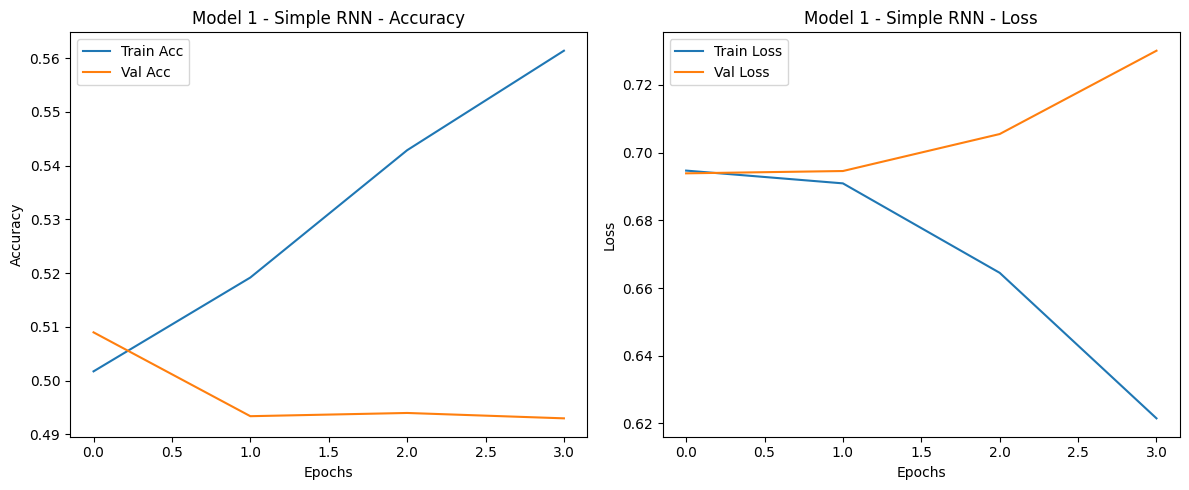

In [ ]:
# Model 1

plot_history(history1, "Model 1 - Simple RNN")

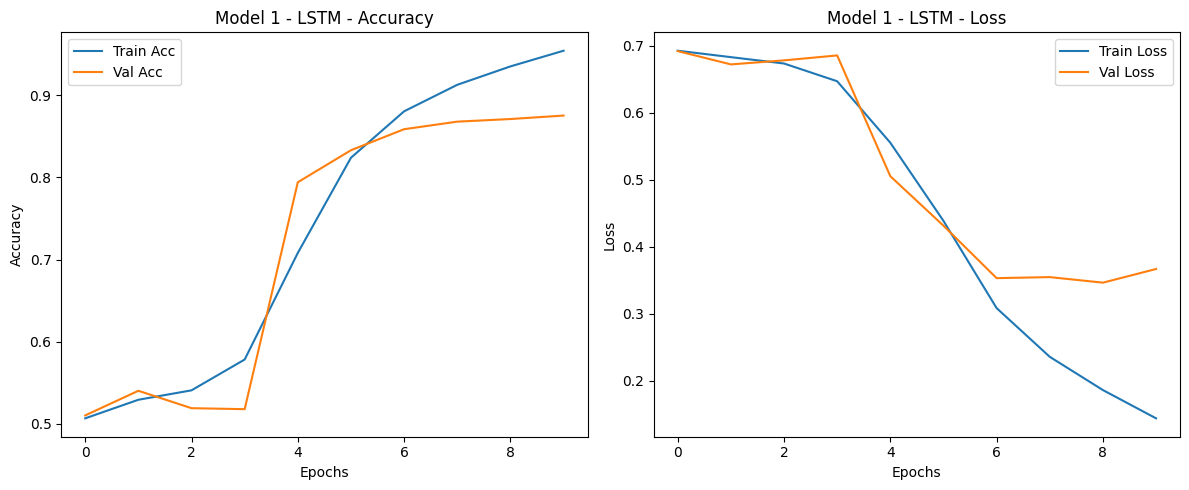

In [ ]:
# Model 2

plot_history(history2, "Model 1 - LSTM")

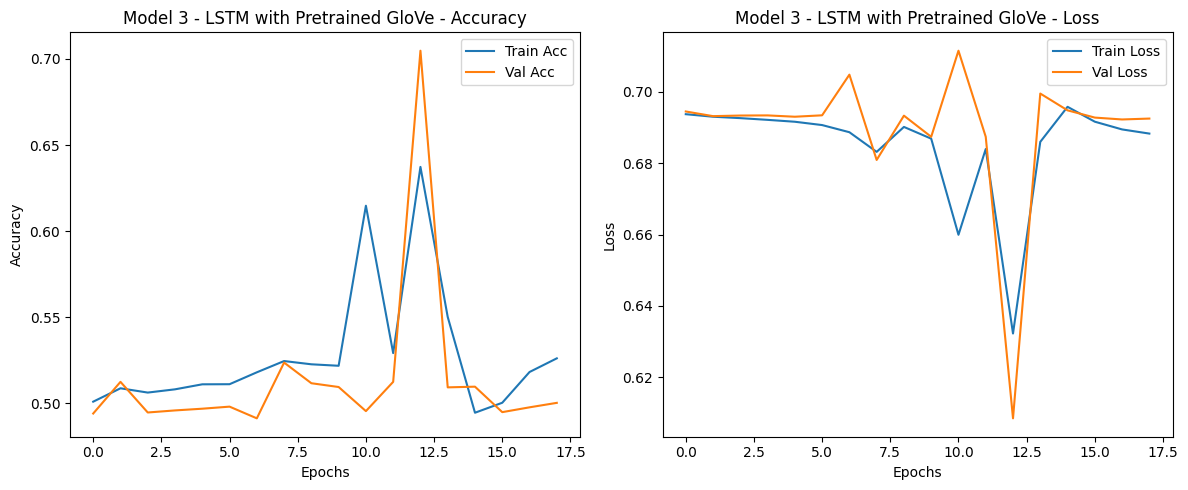

In [ ]:
plot_history(history3, "Model 3 - LSTM with Pretrained GloVe")

###Compare

In [ ]:
# Print final epoch results
print("Model 1 - RNN:")
print(f"Train Acc: {history1.history['accuracy'][-1]}, Val Acc: {history1.history['val_accuracy'][-1]}")
print()

print("Model 2 - LSTM (Trainable Embedding):")
print(f"Train Acc: {history2.history['accuracy'][-1]}, Val Acc: {history2.history['val_accuracy'][-1]}")
print()

print("Model 3 - LSTM (Pretrained Embedding):")
print(f"Train Acc: {history3.history['accuracy'][-1]}, Val Acc: {history3.history['val_accuracy'][-1]}")


Model 1 - RNN:
Train Acc: 0.5613999962806702, Val Acc: 0.49300000071525574

Model 2 - LSTM (Trainable Embedding):
Train Acc: 0.9544000029563904, Val Acc: 0.8754000067710876

Model 3 - LSTM (Pretrained Embedding):
Train Acc: 0.5260571241378784, Val Acc: 0.5001999735832214


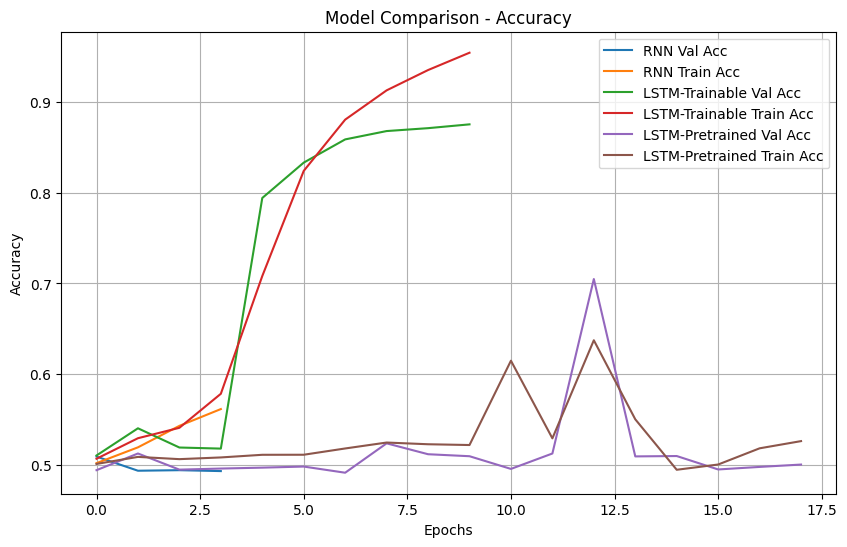

In [ ]:
import matplotlib.pyplot as plt

def plot_model_history(history, label):
    plt.plot(history.history['val_accuracy'], label=f'{label} Val Acc')
    plt.plot(history.history['accuracy'], label=f'{label} Train Acc')

plt.figure(figsize=(10, 6))
plot_model_history(history1, 'RNN')
plot_model_history(history2, 'LSTM-Trainable')
plot_model_history(history3, 'LSTM-Pretrained')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


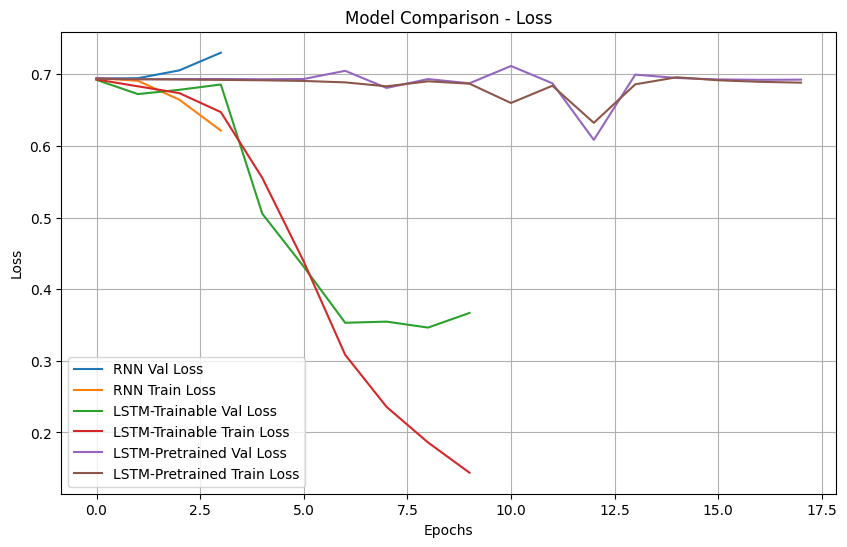

In [ ]:
def plot_loss(history, label):
    plt.plot(history.history['val_loss'], label=f'{label} Val Loss')
    plt.plot(history.history['loss'], label=f'{label} Train Loss')

plt.figure(figsize=(10, 6))
plot_loss(history1, 'RNN')
plot_loss(history2, 'LSTM-Trainable')
plot_loss(history3, 'LSTM-Pretrained')
plt.title('Model Comparison - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


####Evaluation

In [ ]:
# Model 1
# Evaluate - test
test_loss_1, test_acc_1 = simple_rnn_model.evaluate(test_padded, test_labels)
print(f"\nTest Accuracy: {test_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = simple_rnn_model.predict(test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5023 - loss: 0.6946

Test Accuracy: 0.5040
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4961
           1       0.50      1.00      0.67      5039

    accuracy                           0.50     10000
   macro avg       0.75      0.50      0.34     10000
weighted avg       0.75      0.50      0.34     10000


Confusion Matrix:
[[   1 4960]
 [   0 5039]]


In [ ]:
# Model 1
# Evaluate - train
train_loss_1, train_acc_1 = simple_rnn_model.evaluate(train_padded, train_labels)
print(f"\nTrain Accuracy: {train_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = simple_rnn_model.predict(train_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(train_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(train_labels, y_pred))


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5007 - loss: 0.6928

Train Accuracy: 0.4983
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.00      0.00     17584
           1       0.50      1.00      0.66     17416

    accuracy                           0.50     35000
   macro avg       0.67      0.50      0.33     35000
weighted avg       0.67      0.50      0.33     35000


Confusion Matrix:
[[   31 17553]
 [    6 17410]]


In [ ]:
#Model 2
# Accuracy
test_loss_2, test_acc_2 = lstm_model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {test_acc_2:.4f}')

# Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = lstm_model.predict(test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8728 - loss: 0.3210
Test Accuracy: 0.8736
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4961
           1       0.89      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
[[4415  546]
 [ 718 4321]]


In [ ]:
#Model 2
# Accuracy
train_loss_2, train_acc_2 = lstm_model.evaluate(train_padded, train_labels)
print(f'train Accuracy: {train_acc_2:.4f}')

# Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = lstm_model.predict(train_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(train_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(train_labels, y_pred))


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9594 - loss: 0.1489
train Accuracy: 0.9580
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17584
           1       0.97      0.95      0.96     17416

    accuracy                           0.96     35000
   macro avg       0.96      0.96      0.96     35000
weighted avg       0.96      0.96      0.96     35000


Confusion Matrix:
[[16985   599]
 [  870 16546]]


In [ ]:
# Accuracy
test_loss_3, test_acc_3 = lstm_w2v_model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {test_acc_3:.4f}')

# Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = lstm_w2v_model.predict(test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6240 - loss: 0.6674
Test Accuracy: 0.6221
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58      4961
           1       0.60      0.72      0.66      5039

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000


Confusion Matrix:
[[2583 2378]
 [1401 3638]]


In [ ]:
# Accuracy
train_loss_3, train_acc_3 = lstm_w2v_model.evaluate(train_padded, train_labels)
print(f'train Accuracy: {train_acc_3:.4f}')

# Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = lstm_w2v_model.predict(train_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(train_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(train_labels, y_pred))

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6128 - loss: 0.6679
train Accuracy: 0.6138
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.51      0.57     17584
           1       0.59      0.72      0.65     17416

    accuracy                           0.61     35000
   macro avg       0.62      0.61      0.61     35000
weighted avg       0.62      0.61      0.61     35000


Confusion Matrix:
[[ 8915  8669]
 [ 4848 12568]]


In [ ]:
data = {
    'Model': ['Simple RNN', 'LSTM (Trainable)', 'LSTM (Pretrained)'],
    'Train Accuracy': [train_acc_1, train_acc_2, train_acc_3],
    'Test Accuracy': [test_acc_1, test_acc_2, test_acc_3],
    'Train Loss': [train_loss_1, train_loss_2, train_loss_3],
    'Test Loss': [test_loss_1, test_loss_2, test_loss_3],
    'Notes': ['Baseline RNN', 'LSTM with learned embedding', 'LSTM with GloVe']
}

df = pd.DataFrame(data)
df

,Model,Train Accuracy,Test Accuracy,Train Loss,Test Loss,Notes
0,Simple RNN,0.498314,0.5040,0.693049,0.694391,Baseline RNN
1,LSTM (Trainable),0.958029,0.8736,0.150427,0.322297,LSTM with learned embedding
2,LSTM (Pretrained),0.613800,0.6221,0.667766,0.667098,LSTM with GloVe


###Model Save

In [ ]:
#model1
simple_rnn_model.save('simple_rnn_model.keras')
#model2
lstm_model.save('lstm_model.keras')
#model3
lstm_w2v_model.save('lstm_w2v_model.keras')

In [ ]:
#tokenizer
import pickle

# Save tokenizer to file
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
